In [21]:
from matplotlib import pyplot as plt
import numpy as np
import os 
import pickle as pkl

# Recursive Tree

In [241]:
def RecursiveTree(x,y,theta,depth,lenght=10, angle=np.pi/4):
    if depth == 0:
        return
    else:
        x1 = x + lenght*np.cos(theta) 
        y1 = y + lenght*np.sin(theta)
        plt.plot([x,x1],[y,y1],color='white')
        RecursiveTree(x1,y1,theta+angle,depth-1,lenght*0.6,angle)
        RecursiveTree(x1,y1,theta-angle,depth-1,lenght*0.6,angle)

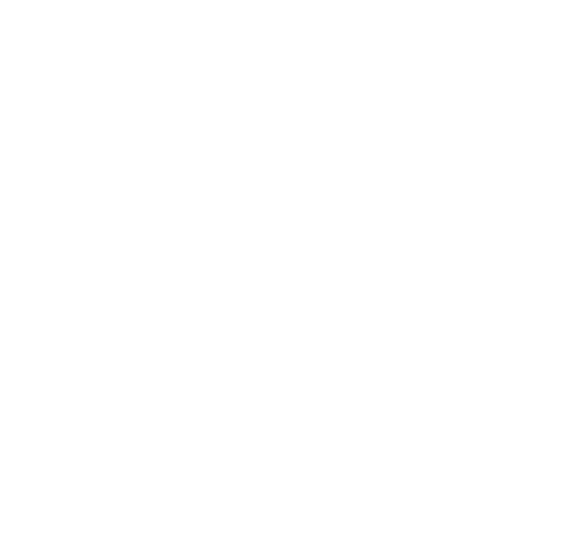

In [242]:
plt.figure(figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.axis('off')
    RecursiveTree(0,0,np.pi/2,10,10,np.pi/i)

# plt.savefig('RecursiveTree.png',dpi=300,bbox_inches='tight')
plt.show()


# Animation

In [2]:
import matplotlib.animation as animation

In [3]:
def RecursiveTreeAnimation(x,y,theta,depth,lenght=10, angle=np.pi/4):
    if depth == 0:
        return
    else:
        x1 = x + lenght*np.cos(theta) 
        y1 = y + lenght*np.sin(theta)

        fig = plt.gcf() # recuperation de la figure courante
        ax = fig.gca()

        ax.plot([x,x1],[y,y1],color='white')
        RecursiveTreeAnimation(x1,y1,theta+angle,depth-1,lenght*0.6,angle)
        RecursiveTreeAnimation(x1,y1,theta-angle,depth-1,lenght*0.6,angle)

MovieWriter ffmpeg unavailable; using Pillow instead.


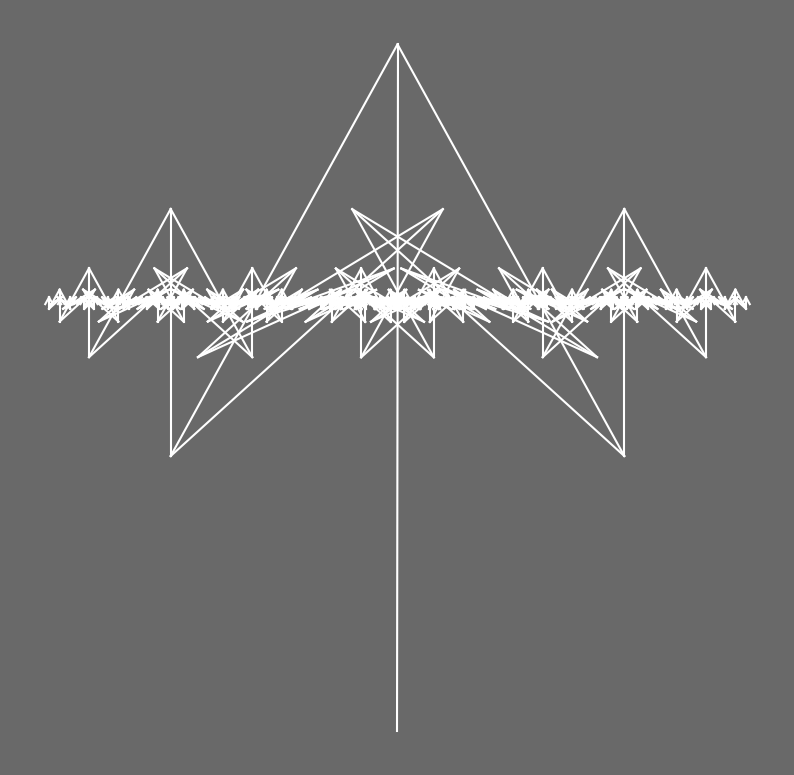

In [7]:
nbiter = 150
fig = plt.figure(figsize=(10,10), dpi=100, facecolor='dimgray')

def animate(i):
    plt.clf()
    theta = np.pi * ((i+1) / (nbiter+1))
    ax  = fig.gca()
    # ax.text(0.95, 0.05, f"theta (Rad) = {theta:.2f}", transform=ax.transAxes, fontsize=14, horizontalalignment='right', verticalalignment='bottom', \
    #         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    plt.axis('off')
    RecursiveTreeAnimation(0,0,np.pi/2,10,10,theta)
    
    return ax

ani = animation.FuncAnimation(fig, animate, frames = nbiter, interval=300, repeat=True )
ani.save('RecursiveTreeNoQuote.gif', bitrate=4000, fps=30)

# Generate a tree with the L-system

## Generate a String from the L-system

In [9]:
def GenerateSentences(rules, generations, currentSentence):
    if generations == 0:
        return currentSentence
    else:
        nextSentence = ''
        for char in currentSentence:
            if char in rules:
                nextSentence += rules[char]
            else:
                nextSentence += char
    # print(f"{generations = }: {currentSentence}")
    return GenerateSentences(rules, generations-1, nextSentence)    

In [267]:
rules = {'F':"FF+[+F-F-F]-[-F+F+F]"}
sentence = 'F'
generations = 4
sentence = GenerateSentences(rules, generations, sentence)
print(sentence)

FF+[+F-F-F]-[-F+F+F]FF+[+F-F-F]-[-F+F+F]+[+FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]]-[-FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]]FF+[+F-F-F]-[-F+F+F]FF+[+F-F-F]-[-F+F+F]+[+FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]]-[-FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]]+[+FF+[+F-F-F]-[-F+F+F]FF+[+F-F-F]-[-F+F+F]+[+FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]]-[-FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]]-FF+[+F-F-F]-[-F+F+F]FF+[+F-F-F]-[-F+F+F]+[+FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]]-[-FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]]-FF+[+F-F-F]-[-F+F+F]FF+[+F-F-F]-[-F+F+F]+[+FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]]-[-FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]]]-[-FF+[+F-F-F]-[-F+F+F]FF+[+F-F-F]-[-F+F+F]+[+FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]]-[-FF+[+F-F-F]-[-F+F+F]+F

## Generate a Tree from the String

In [50]:
def RecursiveTreeWithLSystem(sentence,saveParam=None):
    x = 0
    y = 0
    theta = np.radians(345)
    lenght = 1
    currentAngle = np.pi/2
    stack = []
    nbF = 0
    for char in sentence:
        
        # print(f"{stack = }, {char = }")
        
        if saveParam is not None and char == 'F':
            nbF += 1
            if not os.path.exists(saveParam[:saveParam.rfind('/')]):     # création du sous-répertoire
                 os.makedirs(saveParam[:saveParam.rfind('/')])
            pkl.dump({'x':x,'y':y, 'currentAngle':currentAngle},open(f"{saveParam}{nbF}.pkl",'wb'))

        if char == 'F':
            x1 = x + lenght*np.cos(currentAngle) 
            y1 = y + lenght*np.sin(currentAngle) 
            plt.plot([x,x1],[y,y1],color='white')
            x = x1
            y = y1
            # lenght *= 0.999
        elif char == '+':
            currentAngle += theta
        elif char == '-':
            currentAngle -= theta
        elif char == '[':
            stack.append([x,y,currentAngle])
        elif char == ']':
            x,y,currentAngle = stack.pop()
        
        

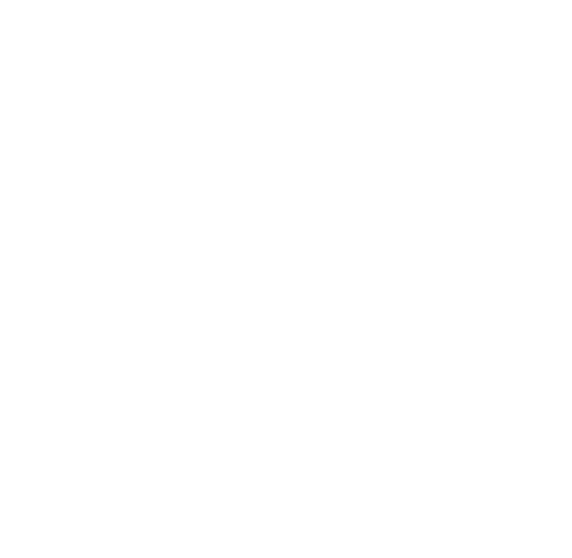

In [268]:
plt.figure(figsize=(10,10))
plt.axis('off')
RecursiveTreeWithLSystem(sentence)

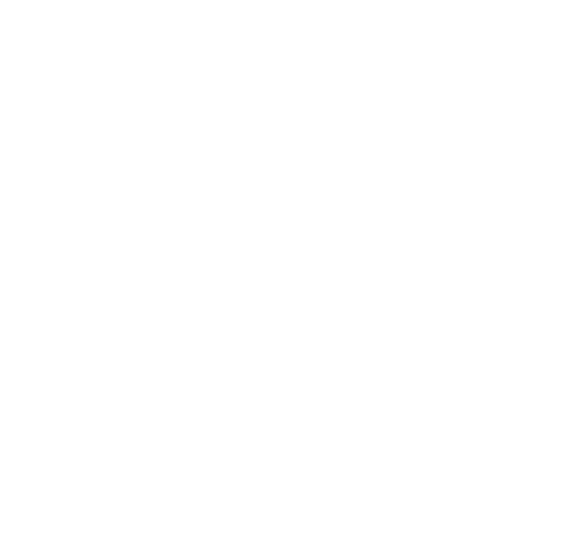

In [271]:
rules = {'F':"FF+[+F-F-X]-[-F+F+X]",'X':"F-[[X]+X]+F[+FX]-X"}
sentence = 'F'
generations = 4
sentence = GenerateSentences(rules, generations, sentence)
# print(sentence)
plt.figure(figsize=(10,10))
plt.axis('off')
RecursiveTreeWithLSystem(sentence)
# plt.savefig('RecursiveTreeWithLSystem2.png',dpi=300,bbox_inches='tight')

## Generate a Tree from the String and Adding Randomness

In [280]:
def RecursiveTreeWithLSystemRandomAngle(sentence,randomVector):
    x = 0
    y = 0
    theta = np.radians(np.random.randint(*randomVector))
    lenght = 1
    currentAngle = np.pi/2
    stack = []
    for char in sentence:
        
        # print(f"{stack = }, {char = }")

        if char == 'F':
            x1 = x + lenght*np.cos(currentAngle) 
            y1 = y + lenght*np.sin(currentAngle) 
            plt.plot([x,x1],[y,y1],color='white')
            x = x1
            y = y1
            # lenght *= 0.999
        elif char == '+':
            currentAngle += theta
            theta = np.radians(np.random.randint(*randomVector))
        elif char == '-':
            currentAngle -= theta
            theta = np.radians(np.random.randint(*randomVector))
        elif char == '[':
            stack.append([x,y,currentAngle])
        elif char == ']':
            x,y,currentAngle = stack.pop()

theta = 0.10471975511965978


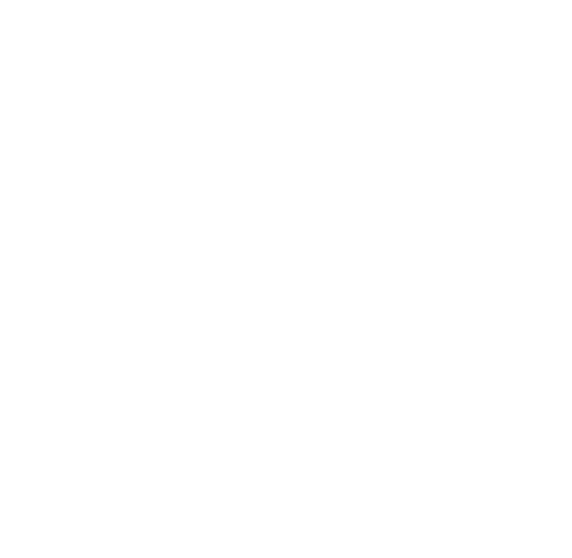

In [285]:
rules = {'F':"FF+[+F-F-X]-[-F+F+X]",'X':"F-[[X]+X]+F[+FX]-X"}
sentence = 'F'
generations = 4
sentence = GenerateSentences(rules, generations, sentence)
# print(sentence)
plt.figure(figsize=(10,10))
plt.axis('off')
vector = (0,10)
RecursiveTreeWithLSystemRandomAngle(sentence, vector)
plt.savefig('RecursiveTreeWithLSystem3.png',dpi=300,bbox_inches='tight')

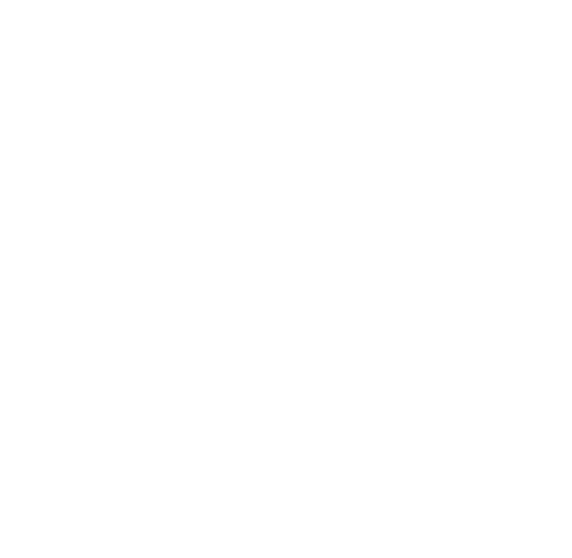

In [64]:
rules = {'F':"FF+[+F-F-F]-[-F+F+F]"}
sentence = 'F'
generations = 4
sentence = GenerateSentences(rules, generations, sentence)

plt.figure(figsize=(10,10))
plt.axis('off')
RecursiveTreeWithLSystem(sentence,saveParam='params/faithful')


MovieWriter ffmpeg unavailable; using Pillow instead.


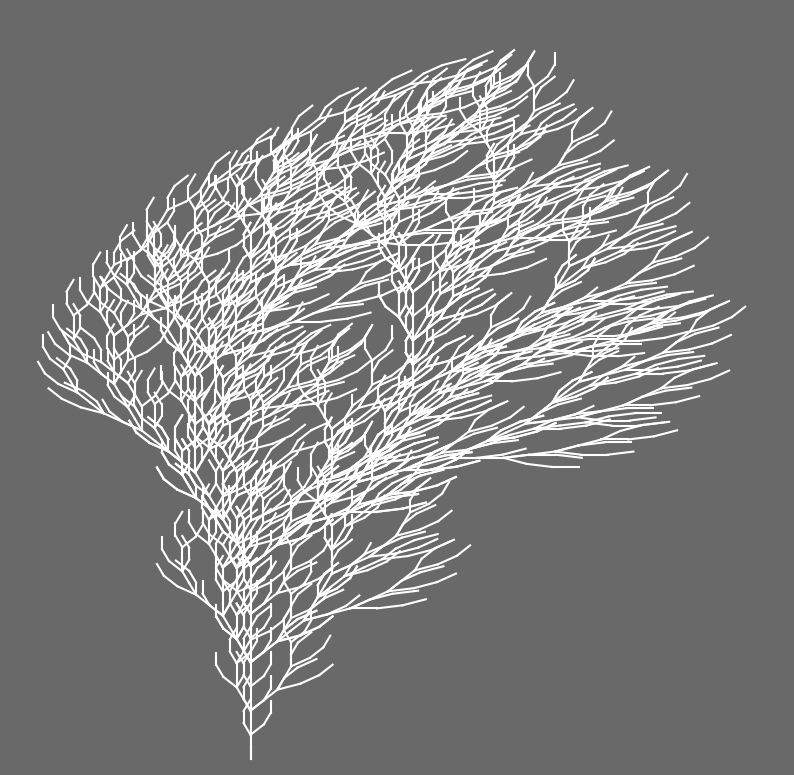

In [70]:
nbiter = sentence.count('F')
fig = plt.figure(figsize=(10,10), dpi=100, facecolor='dimgray')
plt.axis('off')
plt.xlim(-9,20)
plt.ylim(-0.5,62)

data = {'x':0,'y':0,'currentAngle':np.pi/2,'stack':[],'lenght':1}

def animate(i):
    fig = plt.gcf() # recuperation de la figure courante
    ax = fig.gca() # recuperation de l'axe courant

    params_path = 'params'
    fname = 'faithful'

    data = pkl.load(open(params_path+"/"+fname+str(i+1)+".pkl","rb")) # récupération d'un dictionnaire
    x = data['x']
    y = data['y']
    currentAngle = data['currentAngle']
    lenght = 1

    x1 = x + lenght*np.cos(currentAngle) 
    y1 = y + lenght*np.sin(currentAngle) 
    ax.plot([x,x1],[y,y1],color='white')
    
    return ax

ani = animation.FuncAnimation(fig, animate, frames = nbiter, interval=100, repeat=True)
ani.save('LSystemTree4.gif', bitrate=4000, fps=45)